In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv('./SalesAnalysis/Sales_Data/Sales_April_2019.csv')
files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("all_data.csv", index=False)


In [3]:
all_data = pd.read_csv("all_data.csv")

all_data.dropna(inplace=True)
all_data.duplicated().sum()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [4]:
all_data["Month"], all_data["Date"] = all_data["Order Date"].str.split("/").str.get(0), all_data["Order Date"].str.split("/").str.get(1)
all_data["Year"], all_data["Time"] = all_data["Order Date"].str.split("/").str.get(2).str.split(" ").str.get(0), all_data["Order Date"].str.split("/").str.get(2).str.split(" ").str.get(1)
all_data.drop(columns="Order Date", inplace=True)
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Date,Year,Time
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04,19,19,08:46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04,07,19,22:30


Month with the most sales: 12
Total Sales: $ 4,613.44334K


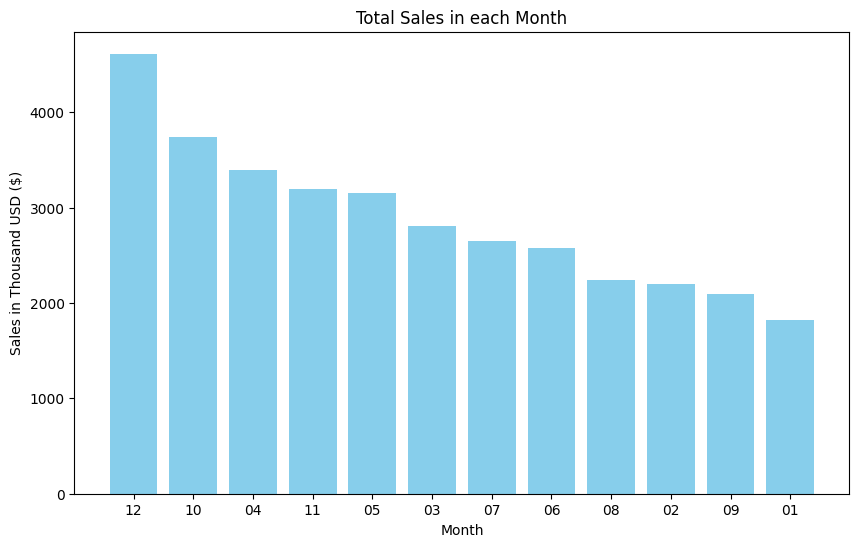

In [5]:
#1. Find the most best month for sales and how much was earned that month
# Ensure numeric conversion and handle invalid entries
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"], errors='coerce')
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"], errors='coerce')

# Drop rows with NaN values resulting from invalid entries
all_data.dropna(subset=
["Quantity Ordered", "Price Each"], inplace=True)
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
month = all_data.groupby("Month")
total_sales = month.sum()["Sales"].sort_values(ascending=False)
best_month = total_sales.idxmax()
best_month_sales = total_sales.max()

total_sales = (total_sales / 1000)
best_month_sales = (best_month_sales / 1000)

print("Month with the most sales:", best_month)
print("Total Sales: $", f"{best_month_sales:,}K")
plt.figure(figsize=(10, 6))
plt.bar(total_sales.index, total_sales.values , color="skyblue")  
plt.ylabel("Sales in Thousand USD ($)")
plt.xlabel("Month")
plt.title("Total Sales in each Month")
plt.show()


City with the most sales: San Francisco (CA)
Total Sales: $ 8,262.20391K


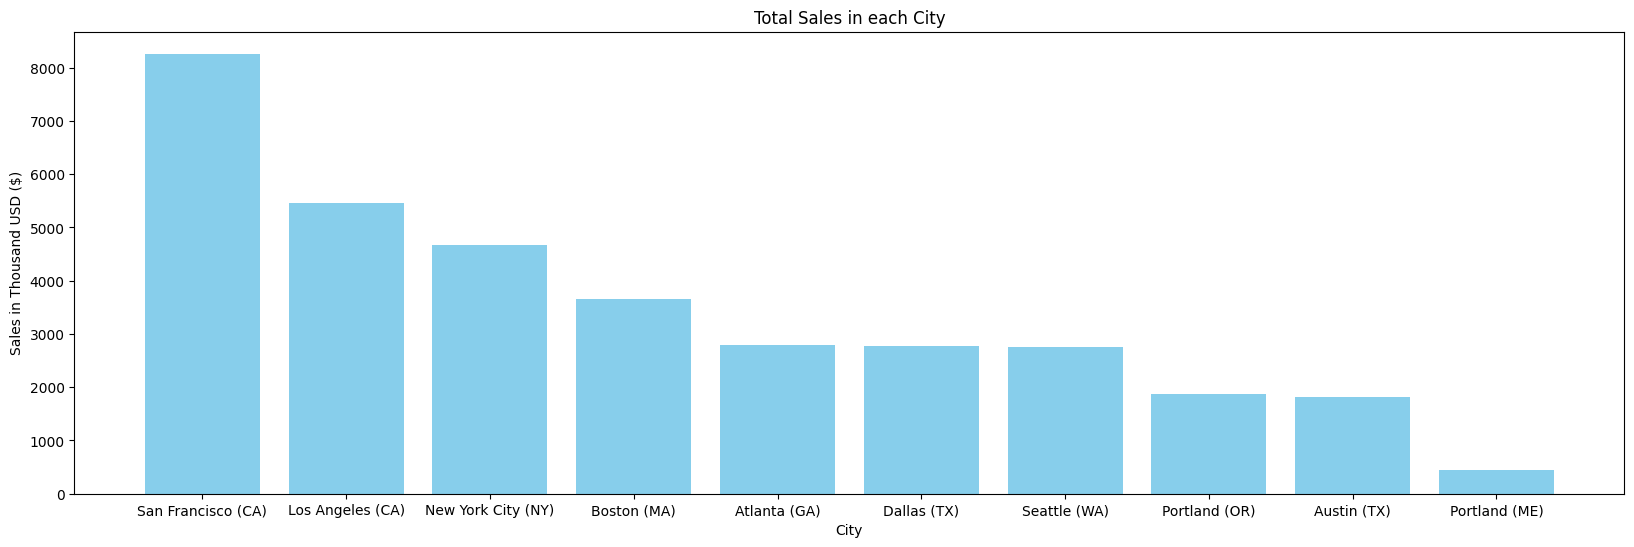

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Date,Year,Time,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",04,19,19,08:46,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",04,07,19,22:30,99.99,Boston (MA)


In [7]:
# 2. City with the most sold out products

# Create 'City' column if it doesn't exist
if 'City' not in all_data.columns:
	all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip() + ' (' + x.split(',')[2].split(' ')[1] + ')')

city = all_data.groupby("City")
total_sales = city["Sales"].sum().sort_values(ascending=False)
best_city = total_sales.idxmax()
best_city_sales = total_sales.max()

total_sales = (total_sales / 1000)
best_city_sales = (best_city_sales / 1000)
print("City with the most sales:", best_city)
print("Total Sales: $", f"{best_city_sales:,}K")
plt.figure(figsize=(20, 6))
plt.bar(total_sales.index, total_sales.values , color="skyblue")  
plt.ylabel("Sales in Thousand USD ($)")
plt.xlabel("City")
plt.title("Total Sales in each City")
plt.show()
all_data.head(2)

Time with the most sales: 19 :00
Total Sales: $ 2,413K
Hour
19    2413.0
12    2317.0
11    2301.0
20    2282.0
18    2219.0
13    2155.0
17    2129.0
14    2084.0
21    2042.0
10    1944.0
15    1942.0
16    1905.0
9     1639.0
22    1608.0
8     1192.0
23    1179.0
7      745.0
0      714.0
1      461.0
6      448.0
2      235.0
5      231.0
4      163.0
3      146.0
Name: Sales, dtype: float64


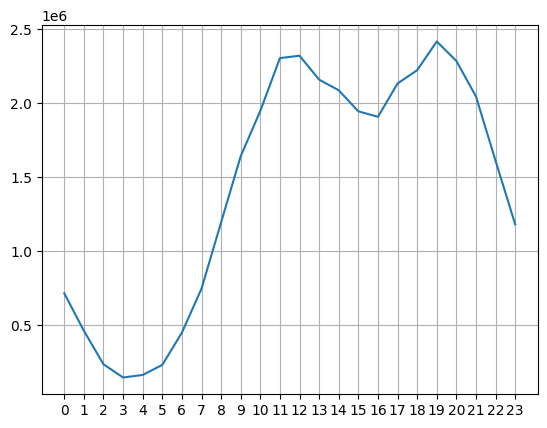

In [9]:
# Extract 'Hour' from 'Time' column if not already present
if 'Hour' not in all_data.columns:
	all_data['Hour'] = all_data['Time'].str.split(':').str[0].astype(int)

# Group by 'Hour' and calculate sales
time = all_data.groupby("Hour")["Sales"].sum().sort_values(ascending=False)
best_time = time.idxmax()
best_time_sales = time.max()
time = (time / 1000).round(0)
best_time_sales = round(best_time_sales / 1000)
print("Time with the most sales:", best_time, ":00")
print("Total Sales: $", f"{best_time_sales:,}K")
print(time)

# Plot the data
keys = sorted(all_data['Hour'].unique())
plt.plot(keys, all_data.groupby(['Hour']).sum()['Sales'])
plt.xticks(keys)
plt.grid()
plt.show()



In [10]:
all_data.head(5)
if 'Time' in all_data.columns:
	all_data.drop(columns=['Time'], inplace=True)
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Date,Year,Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",04,19,19,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",04,07,19,99.99,Boston (MA),22


In [11]:
#### Question 4: What products are most often sold together?
df =  all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(10) 
df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(10)


C:\Users\dadia\AppData\Local\Temp\ipykernel_29072\503996533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [12]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

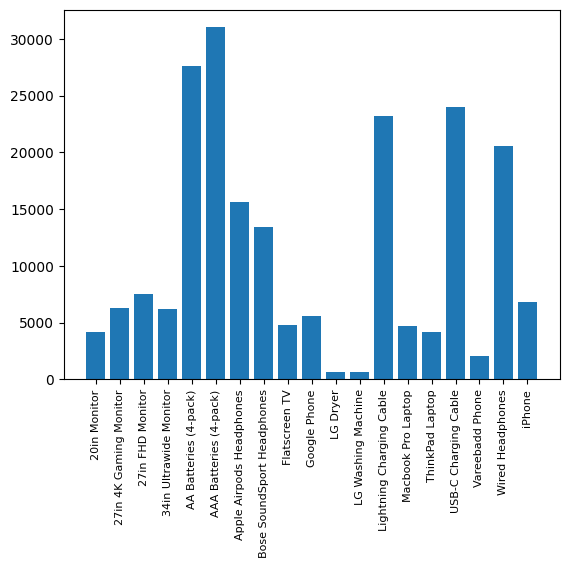

In [13]:
#### What product sold the most? Why do you think it sold the most?
all_data.head(2)
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


C:\Users\dadia\AppData\Local\Temp\ipykernel_2140\254227490.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


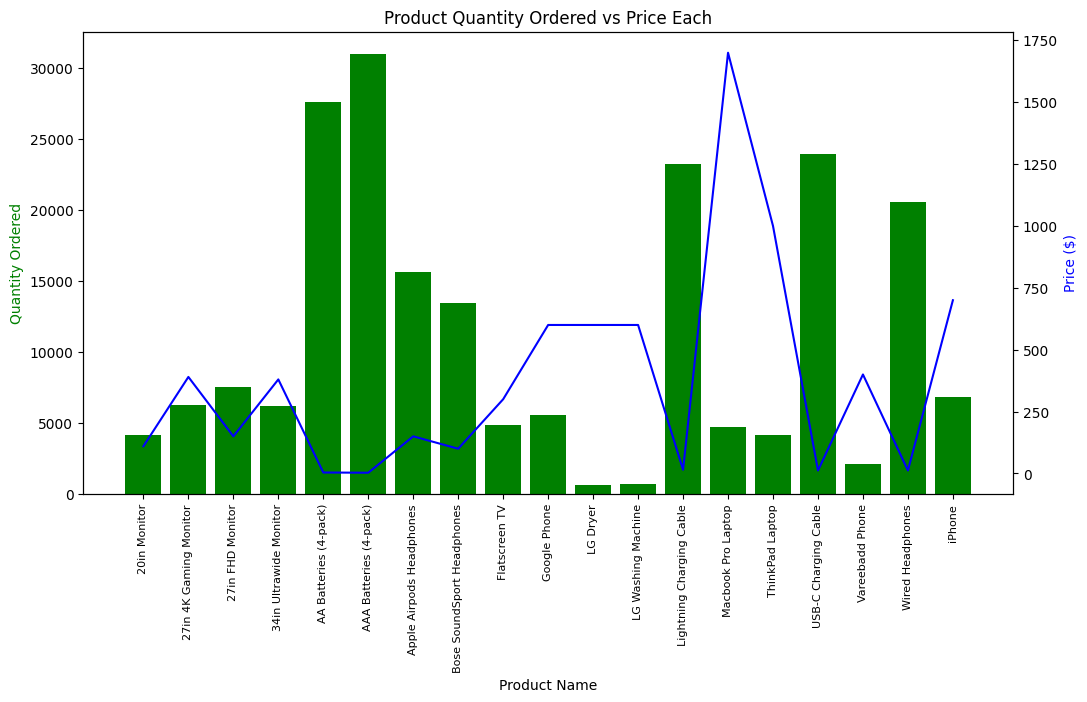

In [43]:
# Ensure 'Price Each' is numeric
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Group by 'Product' and calculate the mean price
prices = all_data.groupby('Product')['Price Each'].mean()

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, 'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)
plt.title('Product Quantity Ordered vs Price Each')
plt.show()